In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from tqdm import tqdm
import re

## preprocessing

In [ ]:
weibo_posts = pd.read_csv('weibo_posts_ML.csv')
weibo_comments = pd.read_csv('weibo_comments_ML.csv')

In [ ]:
print(len(weibo_posts),len(weibo_comments))
weibo_posts = weibo_posts[weibo_posts['pred_relevant']==1]
weibo_comments = weibo_comments[weibo_comments['pred_relevant']==1]
print(len(weibo_posts),len(weibo_comments))

In [ ]:
for i, row in tqdm(weibo_posts.iterrows()):
    n_comment = row['root_comment']
    n_stance = {0:0,1:0,2:0,3:0}
    
    mid = row['mid']
    match = weibo_comments[weibo_comments['answer_id']==mid]
    stances = match.groupby('pred_stance_comment')['pred_stance_comment'].count()
    indexes = stances.index
    for ind in indexes:
        n_stance[ind] = stances[ind]
    for k in range(0,4):
        weibo_posts.loc[i,f'stance_cm_{k}'] = n_stance[k]
weibo_posts

In [ ]:
for i, row in weibo_posts.iterrows():
    comments = weibo_comments[weibo_comments['answer_id']==row['mid']]
    weibo_posts.loc[i,'comment_neu'] = comments['neu'].mean()
    weibo_posts.loc[i,'comment_pos'] = comments['pos'].mean()
    weibo_posts.loc[i,'comment_neg'] = comments['neg'].mean()
    weibo_posts.loc[i,'comment_pas'] = comments['pas'].mean()

In [ ]:
zhihu_posts = pd.read_csv('zhihu_posts_ML.csv')
zhihu_comments = pd.read_csv('zhihu_comments_ML.csv')
print(len(zhihu_posts),len(zhihu_comments))
zhihu_posts = zhihu_posts[zhihu_posts['pred_relevant']==1]
zhihu_comments = zhihu_comments[zhihu_comments['pred_relevant']==1]
print(len(zhihu_posts),len(zhihu_comments))

In [ ]:
for i, row in tqdm(zhihu_posts.iterrows()):
    n_comment = row['root_comment']
    n_stance = {0:0,1:0,2:0,3:0}
    
    mid = row['answer_id']
    match = zhihu_comments[zhihu_comments['answer_id']==mid]
    stances = match.groupby('pred_stance_comment')['pred_stance_comment'].count()
    indexes = stances.index
    for ind in indexes:
        n_stance[ind] = stances[ind]
    for k in range(0,4):
        zhihu_posts.loc[i,f'stance_cm_{k}'] = n_stance[k]

In [ ]:
for i, row in tqdm(weibos.iterrows()):
    if (row['pred_stance'] == 1) or (row['pred_stance'] == 2):
        weibos.loc[i,'mention_ingroup'] = row['pred_mfem']
        weibos.loc[i,'mention_outgroup'] = row['pred_matfem']
        weibos.loc[i,'cm_ingroup'] = row['stance_cm_1']
        weibos.loc[i,'cm_outgroup'] = row['stance_cm_3']
    if row['pred_stance'] == 3:
        weibos.loc[i,'mention_ingroup'] = row['pred_matfem']
        weibos.loc[i,'mention_outgroup'] = row['pred_mfem']
        
        weibos.loc[i,'cm_ingroup'] = row['stance_cm_3']
        weibos.loc[i,'cm_outgroup'] = row['stance_cm_1']
    
    weibos.loc[i,'mention_mixgroup'] = row['pred_mfem'] + row['pred_matfem']

In [ ]:
weibos['neg*m_outgroup'] = weibos['neg'] * weibos['mention_outgroup']
weibos['neg*m_ingroup'] = weibos['neg'] * weibos['mention_ingroup']
weibos['pos*m_outgroup'] = weibos['pos'] * weibos['mention_outgroup']
weibos['pos*m_ingroup'] = weibos['pos'] * weibos['mention_ingroup']


In [ ]:

# weibo_posts['moral_all'] = weibo_posts['neg'] + weibo_posts['pos'] + weibo_posts['pas'] + weibo_posts['neu']
# Assuming df is your DataFrame and 'A' and 'B' are the column names
weibos['neu_ratio'] = weibos['neu']/weibos['text_len']
weibos['pos_ratio'] = weibos['pos']/weibos['text_len']
weibos['neg_ratio'] = weibos['neg']/weibos['text_len']
zhihus['neu_ratio'] = zhihus['neu']/zhihus['text_len']
zhihus['pos_ratio'] = zhihus['pos']/zhihus['text_len']
zhihus['neg_ratio'] = zhihus['neg']/zhihus['text_len']

In [ ]:
# zhihu_posts = pd.read_csv('zhihu_posts_final.csv')

for i, row in tqdm(zhihus.iterrows()):
    zhihus.loc[i,'mention_mixgroup'] = row['pred_mfem'] + row['pred_matfem']
    if (row['pred_stance'] == 1) or (row['pred_stance'] == 2):
        zhihus.loc[i,'mention_ingroup'] = row['pred_mfem']
        zhihus.loc[i,'mention_outgroup'] = row['pred_matfem']
        zhihus.loc[i,'cm_ingroup'] = row['stance_cm_1']
        zhihus.loc[i,'cm_outgroup'] = row['stance_cm_3']
    if row['pred_stance'] == 3:
        zhihus.loc[i,'mention_ingroup'] = row['pred_matfem']
        zhihus.loc[i,'mention_outgroup'] = row['pred_mfem']
        zhihus.loc[i,'mention_mixgroup'] = int(row['pred_mfem'] == row['pred_matfem'])
        zhihus.loc[i,'cm_ingroup'] = row['stance_cm_3']
        zhihus.loc[i,'cm_outgroup'] = row['stance_cm_1']

# zhihu_posts['moral_all'] = zhihu_posts['neg'] + zhihu_posts['pos'] + zhihu_posts['pas'] + zhihu_posts['neu']

for i, row in zhihu_posts.iterrows():
    comments = zhihu_comments[zhihu_comments['answer_id']==row['answer_id']]
    zhihu_posts.loc[i,'comment_neu'] = comments['neu'].mean()
    zhihu_posts.loc[i,'comment_pos'] = comments['pos'].mean()
    zhihu_posts.loc[i,'comment_neg'] = comments['neg'].mean()
    zhihu_posts.loc[i,'comment_pas'] = comments['pas'].mean()

In [ ]:
weibos.to_csv('weibo_posts_final.csv',index=False)
zhihus.to_csv('zhihu_posts_final.csv',index=False)

## Analysis

In [2]:
weibos = pd.read_csv('weibo_posts_final.csv')
zhihus = pd.read_csv('zhihu_posts_final.csv')

In [3]:
weibos_ML = pd.read_csv('weibo_posts_ML.csv')
zhihus_ML = pd.read_csv('zhihu_posts_ML.csv')

In [4]:
def regression(data, IVs, DV):
    df = data[~data[DV].isna()]

    # Add a constant to the independent variables matrix for the regression intercept
    X = sm.add_constant(df[IVs])
    Y = df[DV]

    # Perform the regression analysis
    model = sm.OLS(Y, X)
    results = model.fit()
    params = results.params
    R2 = results.rsquared
    p_value = results.pvalues.round(4)
    return results, params, p_value, R2

### descriptive

In [5]:
weibos.groupby('pred_stance')['like','root_comment','repost','neu', 'pos', 'neg', 'pas','moral_all'].mean()

/var/folders/8v/xpk1jpgx2kbgxh9xl6dwblt00000gp/T/ipykernel_19513/4062901752.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  weibos.groupby('pred_stance')['like','root_comment','repost','neu', 'pos', 'neg', 'pas','moral_all'].mean()


,like,root_comment,repost,neu,pos,neg,pas,moral_all
pred_stance,,,,,,,,
0,628.766058,2.814968,35.653506,4.893047,1.419859,1.961108,0.253978,8.527991
1,54.463611,1.433308,6.670257,4.739538,1.802099,2.378196,0.256879,9.176712
2,43.900410,1.239371,3.120654,3.526059,1.378146,2.286688,0.143189,7.334082
3,63.231722,1.918968,5.607771,3.429563,1.041850,2.311676,0.195328,6.978417


In [6]:
weibos.groupby('pred_stance')['like'].count()

pred_stance
0      3394
1    175285
2     12913
3    116942
Name: like, dtype: int64

In [7]:
len(weibos)

308534

In [8]:
weibos[['like','root_comment','repost','neu', 'pos', 'neg', 'pas','moral_all']].mean()

like            63.662403
root_comment     1.624468
repost           6.437816
neu              4.193927
pos              1.491998
neg              2.344565
pas              0.228759
moral_all        8.259249
dtype: float64

In [9]:
zhihus.groupby('pred_stance')['upvote_count','root_comment','neu', 'pos', 'neg', 'pas','moral_all'].mean()

/var/folders/8v/xpk1jpgx2kbgxh9xl6dwblt00000gp/T/ipykernel_19513/4190815963.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  zhihus.groupby('pred_stance')['upvote_count','root_comment','neu', 'pos', 'neg', 'pas','moral_all'].mean()


,upvote_count,root_comment,neu,pos,neg,pas,moral_all
pred_stance,,,,,,,
0,6.258065,0.822581,4.516129,1.596774,2.000000,0.096774,8.209677
1,20.248303,1.962874,10.725349,3.600000,4.518762,0.487226,19.331337
2,20.472000,1.396000,8.740000,2.928000,4.992000,0.516000,17.176000
3,26.251250,1.696381,4.701971,1.393351,2.787879,0.181524,9.064725


In [10]:
zhihus[['upvote_count','root_comment','neu', 'pos', 'neg', 'pas','moral_all']].mean()

upvote_count    22.494897
root_comment     1.834652
neu              8.276688
pos              2.706456
neg              3.839812
pas              0.366128
moral_all       15.189084
dtype: float64

In [11]:
zhihus.groupby('pred_stance')['neu'].count()

pred_stance
0      62
1    5010
2     250
3    3399
Name: neu, dtype: int64

In [12]:
len(zhihus)

8721

### overall

#### moral all & engagement

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
IVs = ['text_len','pos','neu','neg']
X = sm.add_constant(weibos[IVs])
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

/Users/liaoyufang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


  variables       VIF
0     const  1.425169
1  text_len  4.532599
2       pos  2.221766
3       neu  4.451487
4       neg  2.130847


In [15]:
# zhihus['moral_all'] = zhihus_ML['neu']+zhihus_ML['pos']+zhihus_ML['neg']+zhihus_ML['pas']
# weibos['moral_all'] = weibos_ML['neu']+weibos_ML['pos']+weibos_ML['neg']+weibos_ML['pas']

In [16]:
IVS = [['moral_all'],['moral_all','text_len']]
DVs = ['like','repost','root_comment']
for DV in DVs:
    print('\n==============\n',DV)
    for IVs in IVS:
        results, params, p_value, R2 = regression(weibos, IVs, DV)
        print(results.summary())


 like


/Users/liaoyufang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/liaoyufang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                   like   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     388.1
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           2.47e-86
Time:                        00:00:28   Log-Likelihood:            -2.8843e+06
No. Observations:              308534   AIC:                         5.769e+06
Df Residuals:                  308532   BIC:                         5.769e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0663      5.819      0.871      0.3

/Users/liaoyufang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/liaoyufang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                 repost   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     582.7
Date:                Fri, 10 Nov 2023   Prob (F-statistic):          1.27e-128
Time:                        00:00:29   Log-Likelihood:            -2.3120e+06
No. Observations:              308534   AIC:                         4.624e+06
Df Residuals:                  308532   BIC:                         4.624e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7989      0.911     -5.270      0.0

/Users/liaoyufang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/liaoyufang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:           root_comment   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     3228.
Date:                Fri, 10 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:00:29   Log-Likelihood:            -1.1594e+06
No. Observations:              308533   AIC:                         2.319e+06
Df Residuals:                  308531   BIC:                         2.319e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9936      0.022     45.738      0.0

In [18]:
IVS = [['moral_all'],['moral_all','text_len']]
DVs = ['upvote_count','root_comment']
for DV in DVs:
    print('\n==============\n',DV)
    for IVs in IVS:
        results, params, p_value, R2 = regression(zhihus, IVs, DV)
        print(results.summary())


 upvote_count
                            OLS Regression Results                            
Dep. Variable:           upvote_count   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     94.65
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           2.94e-22
Time:                        00:02:02   Log-Likelihood:                -57926.
No. Observations:                8721   AIC:                         1.159e+05
Df Residuals:                    8719   BIC:                         1.159e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0204      2.213     

/Users/liaoyufang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/liaoyufang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/liaoyufang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/liaoyufang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### moral valence & engagement (visualization)

In [19]:
import matplotlib.pyplot as plt

In [20]:
def get_significance(p):
    stars = ''
    if p < 0.05:
        stars = '*'
    if p < 0.01:
        stars = '**'
    if p < 0.01:
        stars = '***'
    return stars

In [21]:
weibos[['like','repost','root_comment','moral_all','pos','neg']].mean()

like            63.662403
repost           6.437816
root_comment     1.624468
moral_all        8.259249
pos              1.491998
neg              2.344565
dtype: float64

In [22]:
weibos[['like','repost','root_comment','moral_all','pos','neg']].std()

like            2779.496740
repost           435.114563
root_comment      10.424513
moral_all         13.885722
pos                3.162943
neg                4.569931
dtype: float64

/Users/liaoyufang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                   like   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     98.91
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           2.74e-84
Time:                        00:02:11   Log-Likelihood:            -2.8843e+06
No. Observations:              308534   AIC:                         5.769e+06
Df Residuals:                  308529   BIC:                         5.769e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5628      5.830      0.783      0.4

/Users/liaoyufang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                 repost   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     157.6
Date:                Fri, 10 Nov 2023   Prob (F-statistic):          5.30e-135
Time:                        00:02:11   Log-Likelihood:            -2.3120e+06
No. Observations:              308534   AIC:                         4.624e+06
Df Residuals:                  308529   BIC:                         4.624e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.1281      0.912     -5.621      0.0

/Users/liaoyufang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:      top-level comment   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     833.1
Date:                Fri, 10 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:02:11   Log-Likelihood:            -1.1594e+06
No. Observations:              308533   AIC:                         2.319e+06
Df Residuals:                  308528   BIC:                         2.319e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9859      0.022     45.302      0.0

/Users/liaoyufang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/liaoyufang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


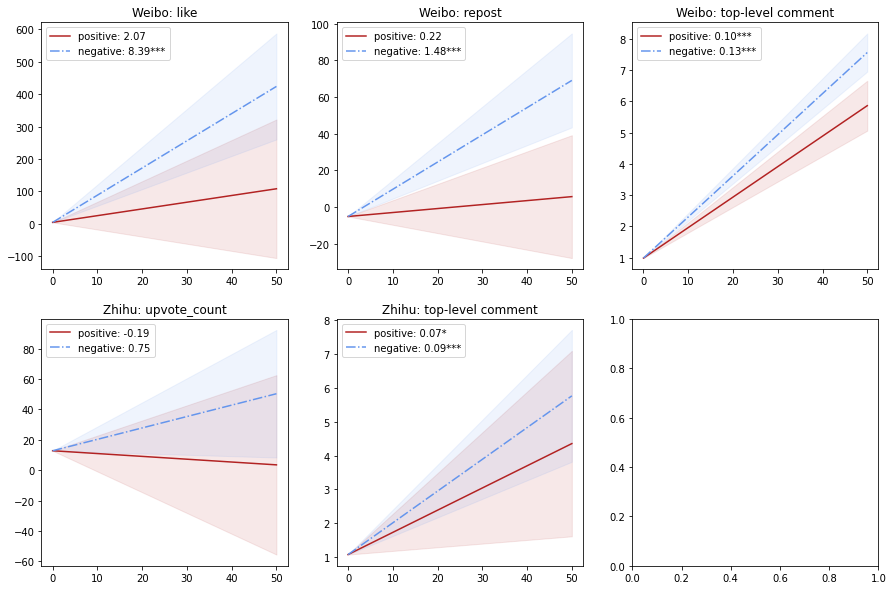

In [23]:
# don't drop duplicated content

IVs = ['pas','neu','pos','neg']
DVS = [['like','repost','top-level comment'],['upvote_count','top-level comment']]

coefficients = {}
constant = 0
ci_upper = {} # upper bound for 95% CI
ci_lower = {} # lower bound for 95% CI

result_reg = {}
var_name = {'neu':'neutral','pos':'positive','neu':'neutral','neg':'negative'}

x = np.linspace(start=0, stop=50, num=400)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

colors = ['firebrick', 'cornflowerblue']
patterns = ['-', '-.']
row = 0
    
for name, df, DVs in zip(['Weibo','Zhihu'],[weibos, zhihus],DVS):
    col = 0
    df = df.rename(columns = {'root_comment':'top-level comment'})
    for DV in DVs:
        results, params, p_value, _ = regression(df, IVs, DV)
        constant = params['const']
        print(results.summary())
        for v in ['pos','neg']:
            coefficients[v] = params[v]
            ci_upper[v] = results.conf_int()[0][v]
            ci_lower[v] = results.conf_int()[1][v]
        for i, var in enumerate(coefficients.keys()):
            y = coefficients[var]*x + constant
            y_upper = ci_upper[var]*x + constant
            y_lower = ci_lower[var]*x + constant

            # Plot the regression line
            significance = get_significance(p_value[var])
            axs[row,col].plot(x, y, color=colors[i], linestyle=patterns[i], label=f'{var_name[var]}: {coefficients[var]:.2f}{significance}')

            # Plot the 95% CI
            axs[row,col].fill_between(x, y_lower, y_upper, color=colors[i], alpha=0.1)

        # Add a legend
        axs[row,col].legend(loc='upper left')
        axs[row,col].set_title(label = f'{name}: {DV}')
        col += 1
    row += 1
# Show the plot
plt.savefig('moral_valence.jpg',dpi=300)
plt.show()


/Users/liaoyufang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                   like   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     115.7
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           8.91e-99
Time:                        00:02:13   Log-Likelihood:            -2.7785e+06
No. Observations:              298078   AIC:                         5.557e+06
Df Residuals:                  298073   BIC:                         5.557e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2349      5.784      0.041      0.9

/Users/liaoyufang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                 repost   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     171.9
Date:                Fri, 10 Nov 2023   Prob (F-statistic):          2.38e-147
Time:                        00:02:14   Log-Likelihood:            -2.2381e+06
No. Observations:              298078   AIC:                         4.476e+06
Df Residuals:                  298073   BIC:                         4.476e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9986      0.944     -6.355      0.0

/Users/liaoyufang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:      top-level comment   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     924.0
Date:                Fri, 10 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:02:14   Log-Likelihood:            -1.1239e+06
No. Observations:              298077   AIC:                         2.248e+06
Df Residuals:                  298072   BIC:                         2.248e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9649      0.022     42.939      0.0

/Users/liaoyufang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/liaoyufang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


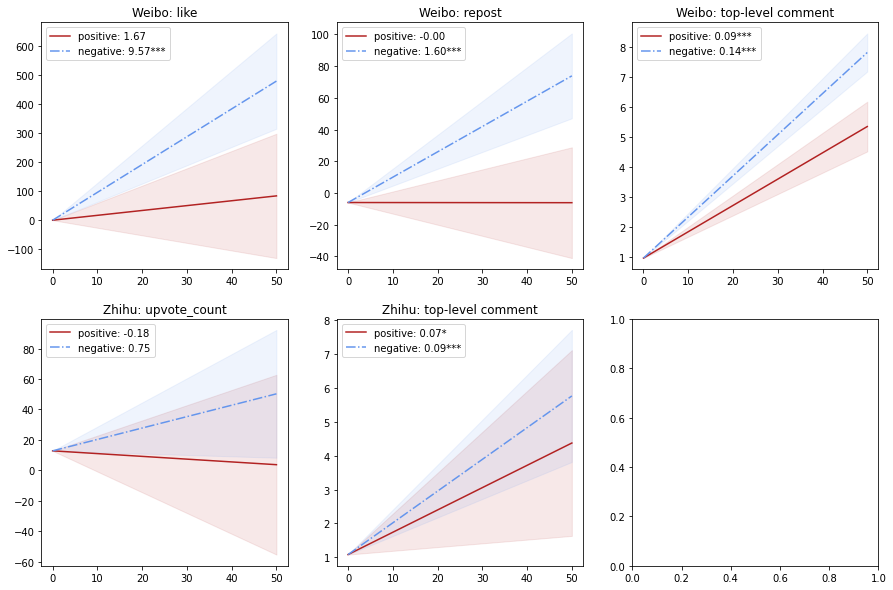

In [24]:
IVs = ['pas','neu','pos','neg']
DVS = [['like','repost','top-level comment'],['upvote_count','top-level comment']]

coefficients = {}
constant = 0
ci_upper = {} # upper bound for 95% CI
ci_lower = {} # lower bound for 95% CI

result_reg = {}
var_name = {'neu':'neutral','pos':'positive','neu':'neutral','neg':'negative'}

x = np.linspace(start=0, stop=50, num=400)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

colors = ['firebrick', 'cornflowerblue']
row = 0
    
for name, df, DVs in zip(['Weibo','Zhihu'],[weibos.drop_duplicates('post_content'), zhihus.drop_duplicates('post_content')],DVS):
    col = 0
    df = df.rename(columns = {'root_comment':'top-level comment'})
    for DV in DVs:
        results, params, p_value, _ = regression(df, IVs, DV)
        constant = params['const']
        print(results.summary())
        for v in ['pos','neg']:
            coefficients[v] = params[v]
            ci_upper[v] = results.conf_int()[0][v]
            ci_lower[v] = results.conf_int()[1][v]
        for i, var in enumerate(coefficients.keys()):
            y = coefficients[var]*x + constant
            y_upper = ci_upper[var]*x + constant
            y_lower = ci_lower[var]*x + constant

            # Plot the regression line
            significance = get_significance(p_value[var])
            axs[row,col].plot(x, y, color=colors[i], linestyle=patterns[i], label=f'{var_name[var]}: {coefficients[var]:.2f}{significance}')

            # Plot the 95% CI
            axs[row,col].fill_between(x, y_lower, y_upper, color=colors[i], alpha=0.1)

        # Add a legend
        axs[row,col].legend(loc='upper left')
        axs[row,col].set_title(label = f'{name}: {DV}')
        col += 1
    row += 1
# Show the plot
# plt.savefig('moral_valence.jpg',dpi=300)
plt.show()


### groups

In [25]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
def get_regression(df,stance):
    regression_results = pd.DataFrame()
    CV = ['text_len']
    regression_save = {}
    for valence in ['moral_all','neg','pos','neu']:
        # for group in ['ingroup','outgroup']:
        #     interaction = f'{valence}*m_{group}'
        #     df[interaction] = df[valence] * df[f'mention_{group}']
        #     IV = [valence, interaction, f'mention_{group}']
        #     IVs = IV + CV
        #     regression_save = {'Stance':stance,'Valence':valence,'Group_mention':group}
            for DV in ['target_group','non_tgt_group','like','repost']:
                regression_save['DV'] = DV
                results, params, p_value, R2 = regression(df, IVs, DV)
                regression_save['param_val'] = params[valence]
                regression_save['pvalue_val'] = p_value[valence]
                regression_save['param_mention'] = params[f'mention_{group}']
                regression_save['pvalue_mention'] = p_value[f'mention_{group}']
                regression_save['param_inter'] = params[interaction]
                regression_save['pvalue_inter'] = p_value[interaction]
                regression_save['R2'] = R2
                regression_results = regression_results.append(regression_save,ignore_index=True)
    return regression_results


In [28]:
selected_wb = weibos[weibos['mention_mixgroup']==1]
selected_zh = zhihus[zhihus['mention_mixgroup']==1]

#### target & comments

In [30]:
for i, row in tqdm(selected_wb.iterrows()):
    if row['pred_mfem'] == 1:
        selected_wb.loc[i,'target_group'] = row['stance_cm_1'] + row['stance_cm_2']
        selected_wb.loc[i,'non_tgt_group'] = row['stance_cm_3']
    else:
        selected_wb.loc[i,'target_group'] = row['stance_cm_3']
        selected_wb.loc[i,'non_tgt_group'] = row['stance_cm_1'] + row['stance_cm_2']  

180247it [01:29, 2018.73it/s]


In [31]:
len(selected_wb)

180247

In [32]:
selected_wb.to_csv('weibo_target.csv',index=False)

In [33]:
selected_wb = pd.read_csv('weibo_target.csv')

In [34]:
selected_wb['root_comment'].sum()

282739.0

In [35]:
for i, row in tqdm(selected_zh.iterrows()):
    if row['pred_mfem'] == 1:
        selected_zh.loc[i,'target_group'] = row['stance_cm_1'] + row['stance_cm_2']
        selected_zh.loc[i,'non_tgt_group'] = row['stance_cm_3']
    else:
        selected_zh.loc[i,'target_group'] = row['stance_cm_3']
        selected_zh.loc[i,'non_tgt_group'] = row['stance_cm_1'] + row['stance_cm_2']  

5295it [00:01, 4197.42it/s]


In [36]:
len(selected_zh)

5295

In [37]:
selected_zh.to_csv('zhihu_target.csv',index=False)

In [38]:
selected_zh = pd.read_csv('zhihu_target.csv')

In [39]:
selected_zh['root_comment'].sum()

9547.0

                            OLS Regression Results                            
Dep. Variable:           target_group   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     168.3
Date:                Fri, 10 Nov 2023   Prob (F-statistic):          4.46e-144
Time:                        00:06:10   Log-Likelihood:            -6.3360e+05
No. Observations:              180247   AIC:                         1.267e+06
Df Residuals:                  180242   BIC:                         1.267e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5855      0.022     26.156      0.0

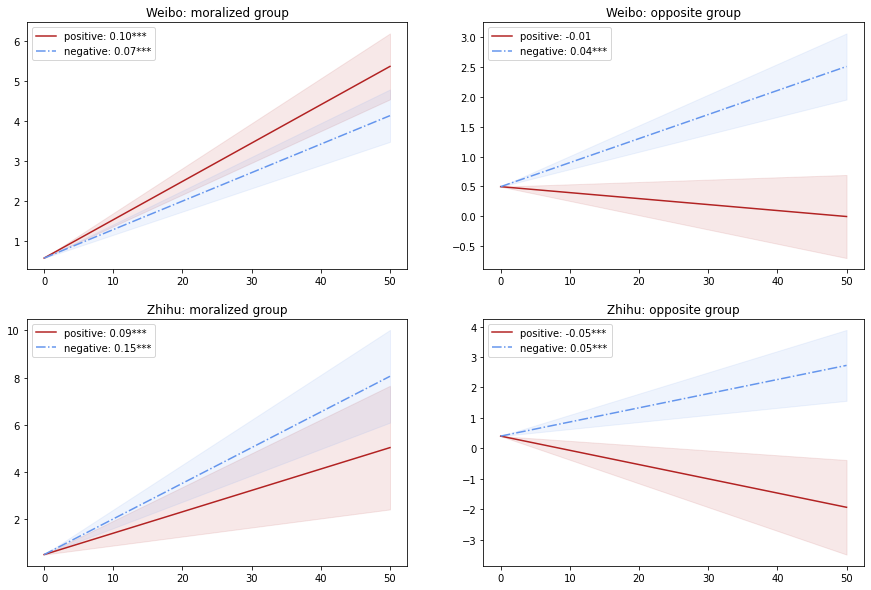

In [40]:
IVs = ['neu','pas','pos','neg']
DVs = ['target_group','non_tgt_group']
DV_name = {'target_group':'moralized group','non_tgt_group':'opposite group'}

coefficients = {}
constant = 0
ci_upper = {} # upper bound for 95% CI
ci_lower = {} # lower bound for 95% CI

result_reg = {}
var_name = {'pos':'positive','neu':'neutral','neg':'negative'}

x = np.linspace(start=0, stop=50, num=400)
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

colors = ['firebrick', 'cornflowerblue']
row = 0


for name, df in zip(['Weibo','Zhihu'],[selected_wb, selected_zh]):
    col = 0
        
    for DV in DVs:
        results, params, p_value, _ = regression(df, IVs, DV)
        constant = params['const']
        print(results.summary())
        for v in ['pos','neg']:
            coefficients[v] = params[v]
            ci_upper[v] = results.conf_int()[0][v]
            ci_lower[v] = results.conf_int()[1][v]
        for i, var in enumerate(coefficients.keys()):
            y = coefficients[var]*x + constant
            y_upper = ci_upper[var]*x + constant
            y_lower = ci_lower[var]*x + constant

            # Plot the regression line
            significance = get_significance(p_value[var])
            axs[row,col].plot(x, y, color=colors[i], linestyle=patterns[i],label=f'{var_name[var]}: {coefficients[var]:.2f}{significance}')

            # Plot the 95% CI
            axs[row,col].fill_between(x, y_lower, y_upper, color=colors[i], alpha=0.1)

        # Add a legend
        axs[row,col].legend(loc='upper left')
        axs[row,col].set_title(label = f'{name}: {DV_name[DV]}')
        col += 1
    row += 1
    
# Show the plot
plt.savefig('target_comments_wb&zh.jpg', dpi=300)
plt.show()


                            OLS Regression Results                            
Dep. Variable:           target_group   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     168.3
Date:                Fri, 10 Nov 2023   Prob (F-statistic):          4.46e-144
Time:                        00:06:40   Log-Likelihood:            -6.3360e+05
No. Observations:              180247   AIC:                         1.267e+06
Df Residuals:                  180242   BIC:                         1.267e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5855      0.022     26.156      0.0

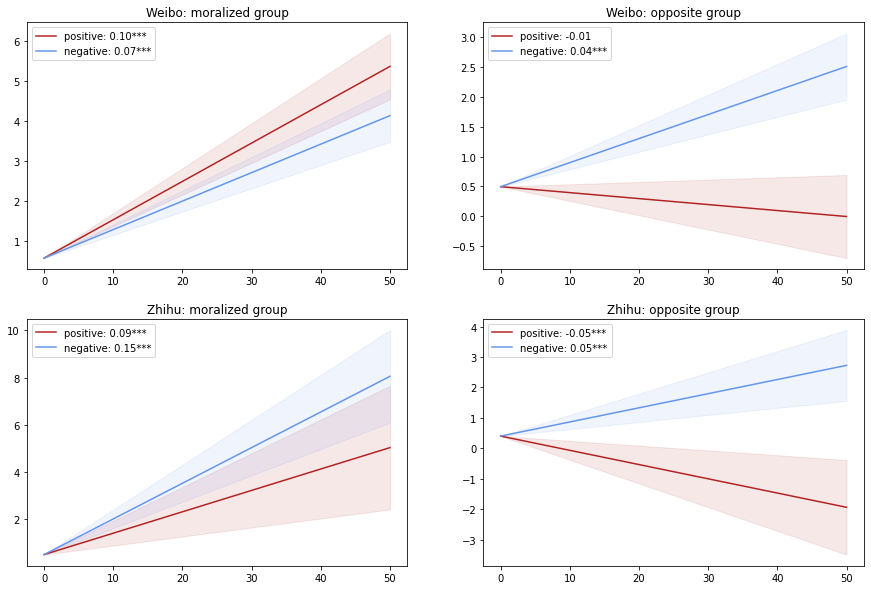

In [42]:
IVs = ['neu','pas','pos','neg']
DVs = ['target_group','non_tgt_group']
DV_name = {'target_group':'moralized group','non_tgt_group':'opposite group'}

coefficients = {}
constant = 0
ci_upper = {} # upper bound for 95% CI
ci_lower = {} # lower bound for 95% CI

result_reg = {}
var_name = {'pos':'positive','neu':'neutral','neg':'negative'}

x = np.linspace(start=0, stop=50, num=400)
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

colors = ['firebrick', 'cornflowerblue']
row = 0


for name, df in zip(['Weibo','Zhihu'],[selected_wb, selected_zh]):
    col = 0
        
    for DV in DVs:
        results, params, p_value, _ = regression(df, IVs, DV)
        constant = params['const']
        print(results.summary())
        for v in ['pos','neg']:
            coefficients[v] = params[v]
            ci_upper[v] = results.conf_int()[0][v]
            ci_lower[v] = results.conf_int()[1][v]
        for i, var in enumerate(coefficients.keys()):
            y = coefficients[var]*x + constant
            y_upper = ci_upper[var]*x + constant
            y_lower = ci_lower[var]*x + constant

            # Plot the regression line
            significance = get_significance(p_value[var])
            axs[row,col].plot(x, y, color=colors[i], label=f'{var_name[var]}: {coefficients[var]:.2f}{significance}')

            # Plot the 95% CI
            axs[row,col].fill_between(x, y_lower, y_upper, color=colors[i], alpha=0.1)

        # Add a legend
        axs[row,col].legend(loc='upper left')
        axs[row,col].set_title(label = f'{name}: {DV_name[DV]}')
        col += 1
    row += 1
    
# Show the plot
plt.savefig('target_comments_wb&zh.jpg', dpi=300)
plt.show()


#### in- & out-group

In [48]:
selected_wb['target'] = selected_wb['mention_outgroup'].apply(lambda x: 'opposite group' if x == 1 else 'moralized group')

df_ttest = selected_wb[~selected_wb['cm_ingroup'].isna()]
df_ttest.groupby('target')['cm_ingroup'].mean()

target
moralized group    1.285062
opposite group     1.319582
Name: cm_ingroup, dtype: float64

In [49]:
selected_zh['target'] = selected_zh['mention_outgroup'].apply(lambda x: 'opposite group' if x == 1 else 'moralized group')

df_ttest_zh = selected_zh[~selected_zh['cm_ingroup'].isna()]
df_ttest_zh.groupby('target')['cm_ingroup'].mean()

target
moralized group    1.663624
opposite group     1.207226
Name: cm_ingroup, dtype: float64

In [50]:
for v in ['moral_all','neu','pos','neg','cm_ingroup','cm_outgroup']:
    A = df_ttest[df_ttest['target']=='opposite group']
    B = df_ttest[df_ttest['target']=='moralized group']
    t = round(stats.ttest_ind(A[v],B[v]).statistic,3)
    pvalue = round(stats.ttest_ind(A[v],B[v]).pvalue,3)
    print(f'{v}:\nt: {t}\tp: {pvalue}')

moral_all:
t: 10.211	p: 0.0
neu:
t: 9.715	p: 0.0
pos:
t: -11.294	p: 0.0
neg:
t: 22.438	p: 0.0
cm_ingroup:
t: 0.714	p: 0.475
cm_outgroup:
t: 4.609	p: 0.0


In [46]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

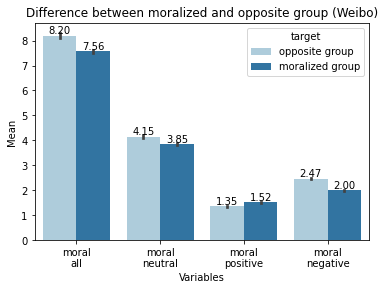

In [51]:
data_for_plot = pd.melt(selected_wb, id_vars=['ID','target'], value_vars=['moral_all','neu','pos','neg'], var_name='Variables', value_name='value', col_level=None, ignore_index=True)
sns.set_palette("Paired")
ax = sns.barplot(data=data_for_plot, x='Variables', y='value', hue='target')
ax.set(xticklabels=['moral\nall','moral\nneutral','moral\npositive','moral\nnegative'])
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.title('Difference between moralized and opposite group (Weibo)')
plt.xlabel('Variables')
# plt.xticks(rotation = 30)
plt.ylabel('Mean')

plt.savefig('Difference between targeting in- and out-group.jpg',dpi=300)
plt.show()

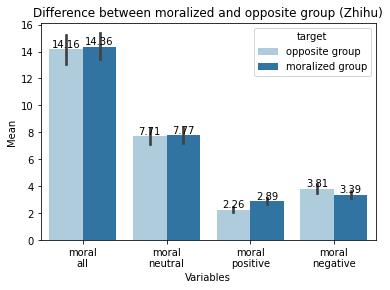

In [52]:
data_for_plot_zh = pd.melt(selected_zh, id_vars=['ID','target'], value_vars=['moral_all','neu','pos','neg'], var_name='Variables', value_name='value', col_level=None, ignore_index=True)
sns.set_palette("Paired")
ax = sns.barplot(data=data_for_plot_zh, x='Variables', y='value', hue='target')
ax.set(xticklabels=['moral\nall','moral\nneutral','moral\npositive','moral\nnegative'])
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.title('Difference between moralized and opposite group (Zhihu)')
plt.xlabel('Variables')
# plt.xticks(rotation = 30)
plt.ylabel('Mean')

plt.savefig('Difference between targeting in- and out-group_zh.jpg',dpi=300)
plt.show()

In [53]:
for v in ['moral_all','neu','pos','neg','cm_ingroup','cm_outgroup']:
    A = df_ttest_zh[df_ttest_zh['target']=='opposite group']
    B = df_ttest_zh[df_ttest_zh['target']=='moralized group']
    t = round(stats.ttest_ind(A[v],B[v]).statistic,3)
    pvalue = round(stats.ttest_ind(A[v],B[v]).pvalue,3)
    print(f'{v}:\nt: {t}\tp: {pvalue}')

moral_all:
t: -0.372	p: 0.71
neu:
t: -0.25	p: 0.802
pos:
t: -4.073	p: 0.0
neg:
t: 1.903	p: 0.057
cm_ingroup:
t: -2.384	p: 0.017
cm_outgroup:
t: 2.677	p: 0.007
